In [1]:
# Librerie per la manipolazione dei dati
import numpy as np                
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt    

# Riduzione dimensionale e pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Algoritmi di clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Metriche di valutazione dei cluster
from sklearn.metrics import silhouette_samples, silhouette_score

# Algoritmi per il numero ottimale di cluster
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('dataset/obesity.csv')

In [3]:
# Dizionario di mapping
mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

mapping_features =['CAEC']
# Applicare il mapping
df[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))


In [4]:
'''# Dizionario di mapping
mapping = {
    'Public_Transportation': 0,
    'Walking': 0,
    'Automobile': 1,
    'Motorbike': 1
}

mapping_features =['MTRANS']
# Applicare il mapping
df[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))'''


"# Dizionario di mapping\nmapping = {\n    'Public_Transportation': 0,\n    'Walking': 0,\n    'Automobile': 1,\n    'Motorbike': 1\n}\n\nmapping_features =['MTRANS']\n# Applicare il mapping\ndf[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))"

In [5]:
# Dizionario di mapping
mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

mapping_features =['CALC']
# Applicare il mapping
df[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))


In [6]:
# Dizionario di mapping
mapping = {
    'no': False,
    'yes': True
}

mapping_features =['SMOKE', 'family_history','FAVC', 'SCC']
# Applicare il mapping
df[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))


In [7]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [8]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,True,False,2.0,3.0,1,False,2.000000,False,0.000000,1.000000,0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,True,False,3.0,3.0,1,True,3.000000,True,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,True,False,2.0,3.0,1,False,2.000000,False,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,False,False,3.0,3.0,1,False,2.000000,False,2.000000,0.000000,2,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,False,False,2.0,1.0,1,False,2.000000,False,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,True,True,3.0,3.0,1,False,1.728139,False,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,True,True,3.0,3.0,1,False,2.005130,False,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,True,True,3.0,3.0,1,False,2.054193,False,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,True,True,3.0,3.0,1,False,2.852339,False,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


## Correlation Analysis

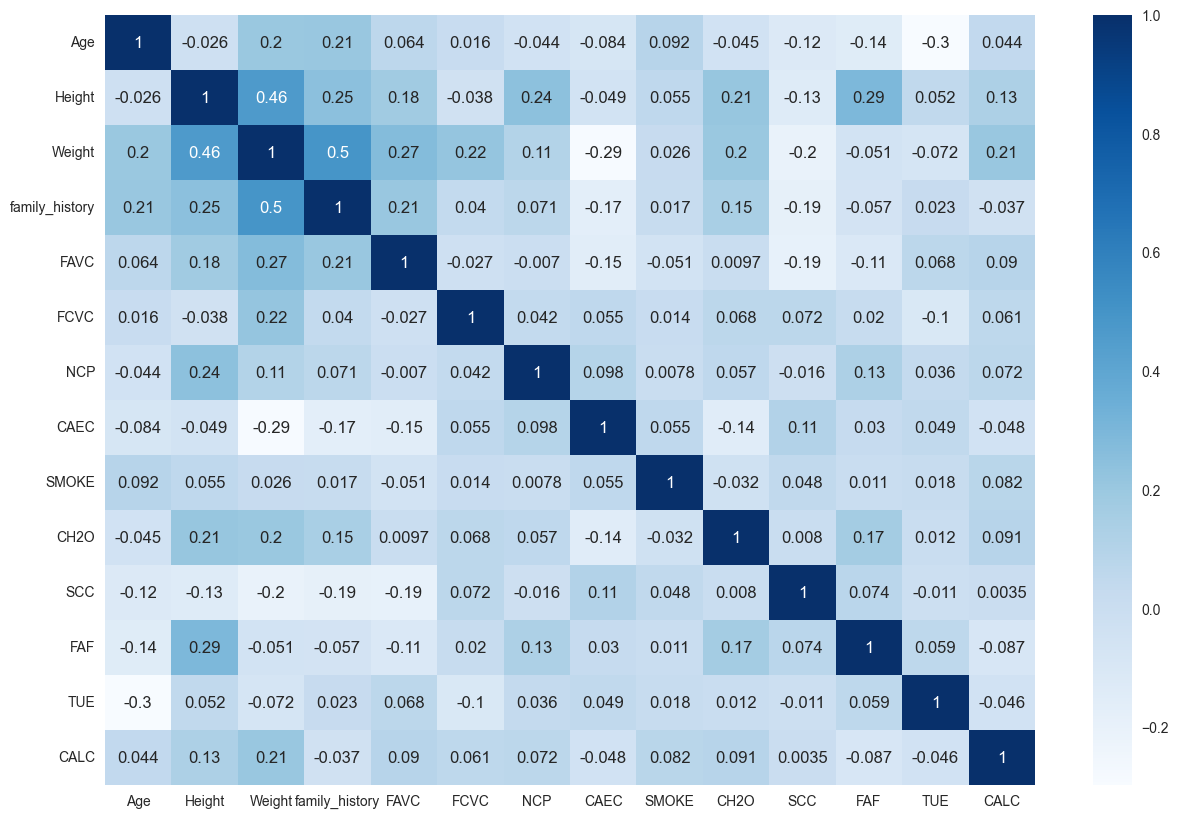

In [9]:
# Creazione e visualizzazione della heatmap per il sottoinsieme selezionato con dimensioni personalizzate della figura
plt.figure(figsize=(15, 10))
heatmap_data = df[['Age', 'Height', 'Weight', 'family_history', 'FAVC', 
    'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC'
]].corr()

ax = sns.heatmap(
    heatmap_data,
    cmap="Blues",
    annot=True,
    annot_kws={"size": 12}
)  # Visualizza la heatmap con annotazioni
plt.show()


## PCA

In [10]:
filtered_data = df

# Selezione delle feature, sostituendo Height e Weight con bmi
data = df[['Age', 'Height', 'Weight', 'family_history', 'FAVC',
           'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC'
    ]]

# Imputazione con la media
data = data.fillna(data.mean())

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [11]:
pca = PCA(n_components=2)  # Sostituisci 2 con il numero di componenti che vuoi
data= pca.fit_transform(data_scaled)

## Elbow Method

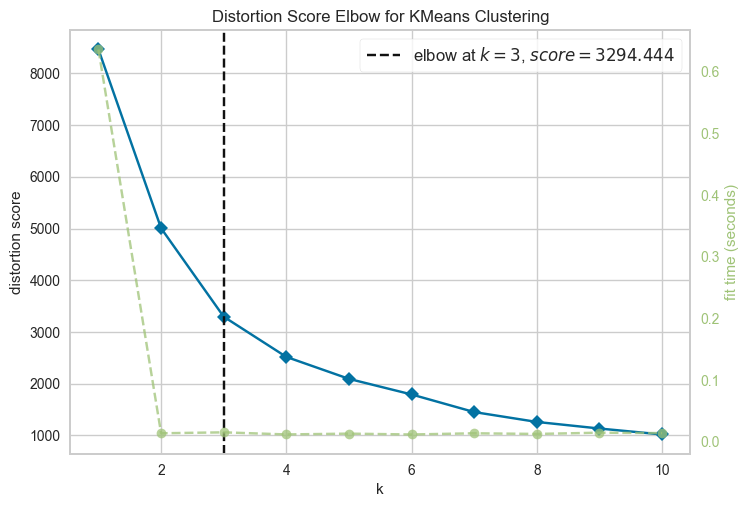

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Determina il numero ottimale di cluster usando il metodo Elbow
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', timings=True)
visualizer.fit(data)
visualizer.show()


## K-Means

In [13]:
# Applica K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
clusters = kmeans.predict(data)

# Aggiungi i cluster al DataFrame
filtered_data['Cluster'] = clusters

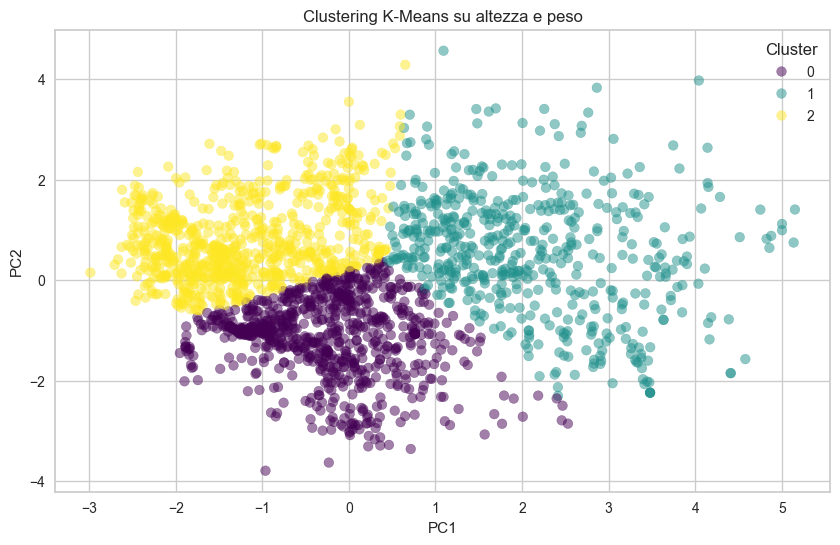

In [14]:
# Grafico del clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering K-Means su altezza e peso')
plt.legend(*scatter.legend_elements(), title="Cluster", loc='best')
plt.show()

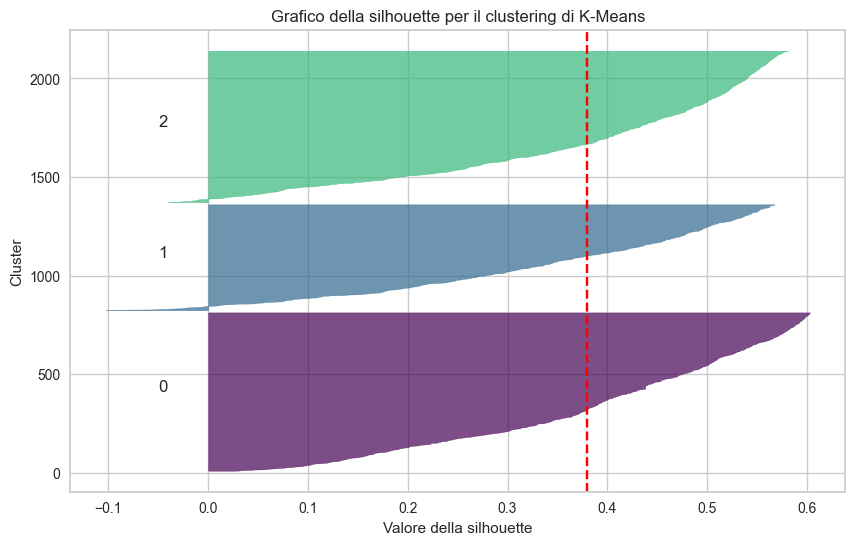

In [15]:
# Calcola i campioni di silhouette per ciascun punto
silhouette_vals = silhouette_samples(data, clusters)

# Calcola la silhouette media per l'intero clustering
silhouette_avg = silhouette_score(data, clusters)

# Visualizza il grafico della silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
n_clusters = len(set(clusters))

for i in range(n_clusters):
    # Accumula i valori di silhouette del cluster i e ordina i valori
    ith_cluster_silhouette_vals = silhouette_vals[clusters == i]
    ith_cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(ith_cluster_silhouette_vals)
    color = plt.cm.viridis(i / n_clusters)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Etichetta ogni silhouette con il rispettivo cluster al centro del grafico
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))
    
    # Aggiorna y_lower per il prossimo cluster
    y_lower = y_upper + 10

# Linea verticale per la silhouette media dell'intero clustering
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.xlabel("Valore della silhouette")
plt.ylabel("Cluster")
plt.title("Grafico della silhouette per il clustering di K-Means")
plt.show()

## Clusters Description

    Cluster              Obesity  Count
0         1  Insufficient_Weight    200
1         1        Normal_Weight    199
2         0       Obesity_Type_I    192
3         2      Obesity_Type_II    187
4         0     Obesity_Type_III    175
5         2     Obesity_Type_III    149
6         2       Obesity_Type_I    147
7         0  Overweight_Level_II    142
8         0   Overweight_Level_I    131
9         0      Obesity_Type_II    109
10        2   Overweight_Level_I     96
11        2  Overweight_Level_II     85
12        2  Insufficient_Weight     67
13        1  Overweight_Level_II     63
14        1   Overweight_Level_I     63
15        0        Normal_Weight     50
16        2        Normal_Weight     38
17        1       Obesity_Type_I     12
18        0  Insufficient_Weight      5
19        1      Obesity_Type_II      1


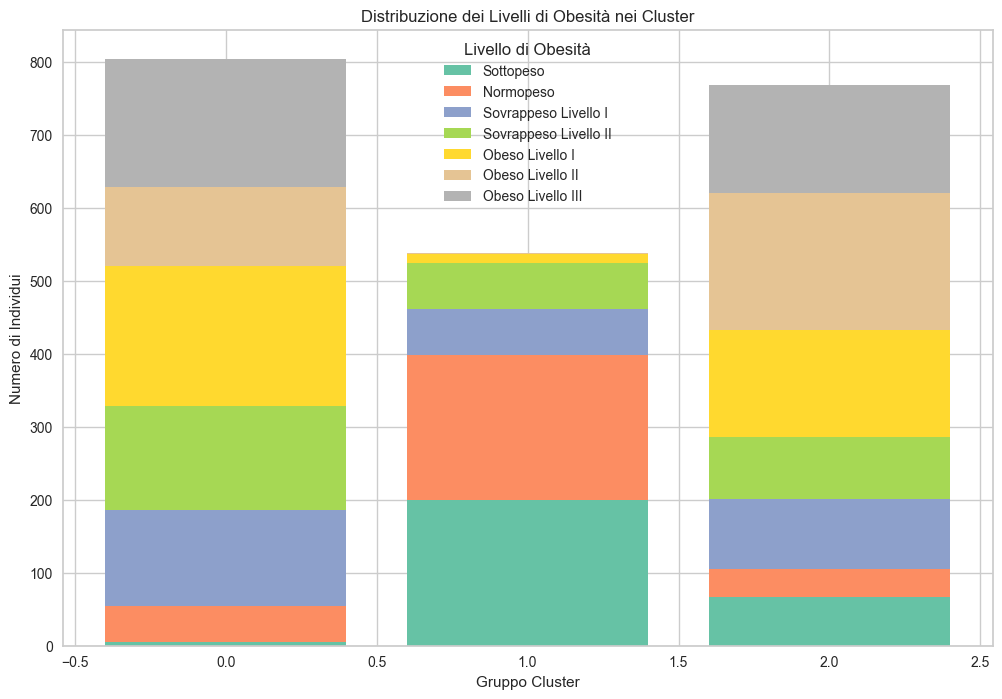

In [16]:
# Conta il numero di individui per Cluster e Livello di Obesità
obesity_per_cluster = filtered_data.value_counts(["Cluster", "Obesity"]).reset_index(name="Count")
print(obesity_per_cluster)

# Mappatura dei livelli di obesità ai nuovi nomi
obesity_labels = {
    "Insufficient_Weight": "Sottopeso",
    "Normal_Weight": "Normopeso",
    "Overweight_Level_I": "Sovrappeso Livello I",
    "Overweight_Level_II": "Sovrappeso Livello II",
    "Obesity_Type_I": "Obeso Livello I",
    "Obesity_Type_II": "Obeso Livello II",
    "Obesity_Type_III": "Obeso Livello III"
}

# Sostituzione dei nomi nel dataframe
obesity_per_cluster["Obesity"] = obesity_per_cluster["Obesity"].replace(obesity_labels)

# Definisci l'ordine desiderato dei livelli di obesità
ordine_obesità = [
    "Sottopeso",
    "Normopeso",
    "Sovrappeso Livello I",
    "Sovrappeso Livello II",
    "Obeso Livello I",
    "Obeso Livello II",
    "Obeso Livello III"
]

# Selezione della colormap e assegnazione di un colore per ciascun livello (seguendo l'ordine)
colormap = plt.colormaps["Set2"]
colori = {label: colormap(i / (len(ordine_obesità) - 1)) for i, label in enumerate(ordine_obesità)}

# Ottieni la lista dei cluster presenti
clusters = sorted(obesity_per_cluster["Cluster"].unique())

# Inizializza per ogni cluster il valore 'bottom' per l'impilamento
bottoms = {cluster: 0 for cluster in clusters}

plt.figure(figsize=(12, 8))
# Per ogni livello di obesità, nell'ordine specificato, disegna il segmento corrispondente per ogni cluster
for livello in ordine_obesità:
    for cluster in clusters:
        # Filtra il dataframe per il cluster e il livello corrente
        row = obesity_per_cluster[(obesity_per_cluster["Cluster"] == cluster) & (obesity_per_cluster["Obesity"] == livello)]
        count = row["Count"].iloc[0] if not row.empty else 0
        # Disegna il segmento impilato. Aggiungiamo l'etichetta solo per il primo cluster per evitare duplicazioni in legenda.
        if cluster == clusters[0]:
            plt.bar(cluster, count, bottom=bottoms[cluster], color=colori[livello], label=livello)
        else:
            plt.bar(cluster, count, bottom=bottoms[cluster], color=colori[livello])
        bottoms[cluster] += count

# Personalizzazione del grafico
plt.xlabel("Gruppo Cluster")
plt.ylabel("Numero di Individui")
plt.title("Distribuzione dei Livelli di Obesità nei Cluster")
plt.legend(title="Livello di Obesità",loc="upper center")  # Sfondo bianco e opacità al 100%
plt.show()


# DBSCAN

In [17]:
filtered_data = df
data = filtered_data[['Age', 'Height', 'Weight', 'family_history', 'FAVC', 
    'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC']]

# Imputazione con la media
data = data.fillna(data.mean())

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


pca = PCA(n_components=2)  # Sostituisci 2 con il numero di componenti che vuoi
pca_result = pca.fit_transform(data_scaled)

In [18]:
# Calcola le distanze dai vicini più prossimi
k = 15 # Imposta 'k' uguale a min_samples.+-
neigh = NearestNeighbors(n_neighbors=k)
neighbors = neigh.fit(pca_result)
distances, indices = neighbors.kneighbors(pca_result)

# Ordina le distanze in ordine crescente
distances = np.sort(distances[:, 1], axis=0)  # Prendi solo la seconda colonna per la distanza dal 2° vicino

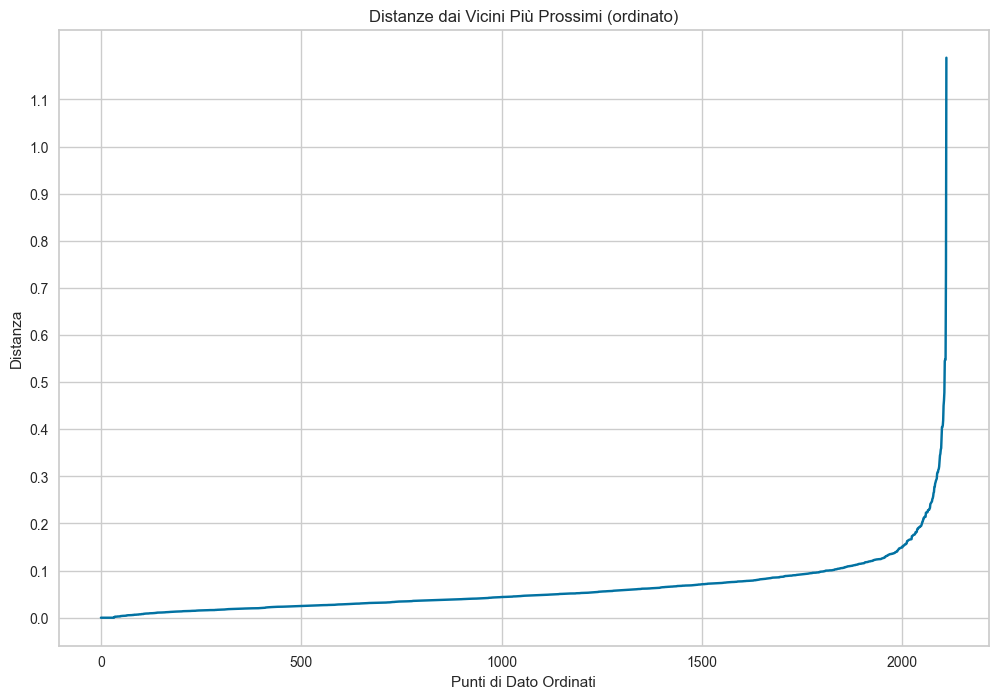

In [19]:
# Traccia il grafico per trovare il valore di epsilon
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.title('Distanze dai Vicini Più Prossimi (ordinato)')
plt.xlabel('Punti di Dato Ordinati')
plt.ylabel('Distanza')
plt.grid(True)

y_ticks = np.arange(0, np.max(distances), step=0.1)  # Modifica

plt.yticks(y_ticks)

plt.show()

In [20]:
# Esegui DBSCAN sui risultati della PCA
dbscan = DBSCAN(eps=0.2, min_samples=k)  # Imposta eps e min_samples in base ai tuoi dati
dbscan_labels = dbscan.fit_predict(pca_result)

filtered_data['db_scan_Cluster'] = dbscan_labels

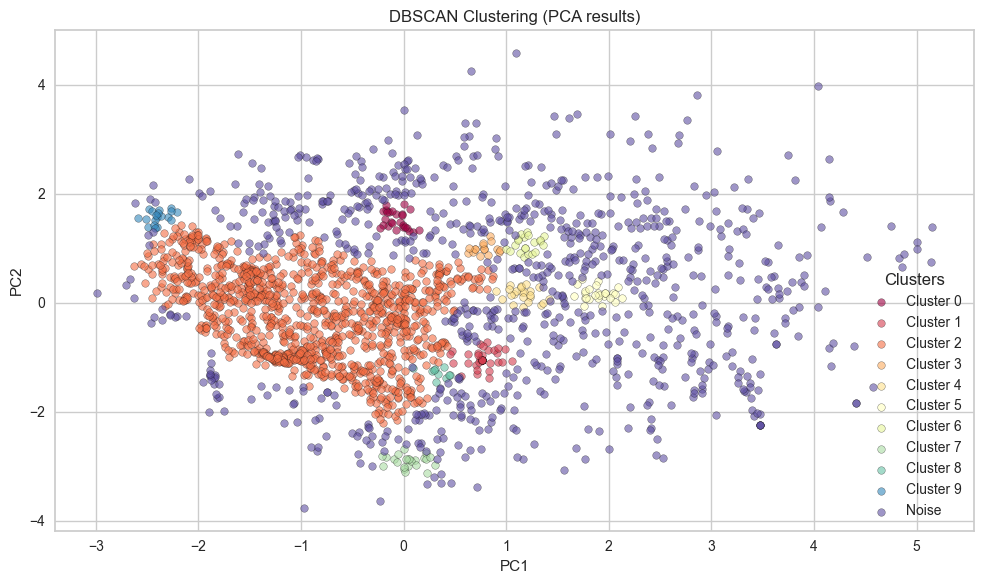

In [21]:
# Crea un grafico dei dati dopo l'applicazione della PCA
plt.figure(figsize=(10, 6))

# DBSCAN assegna -1 ai punti considerati "rumore"
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i, col in zip(unique_labels, colors):
    class_member_mask = (dbscan_labels == i)
    xy = pca_result[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], label=f"Cluster {i}" if i != -1 else 'Noise', edgecolors='k', alpha=0.6)

plt.title('DBSCAN Clustering (PCA results)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Aggiusta la posizione e la dimensione della legenda per migliorarne la leggibilità
plt.legend(fontsize=10, title="Clusters")

plt.tight_layout()  # Per evitare che la legenda si sovrapponga
plt.show()


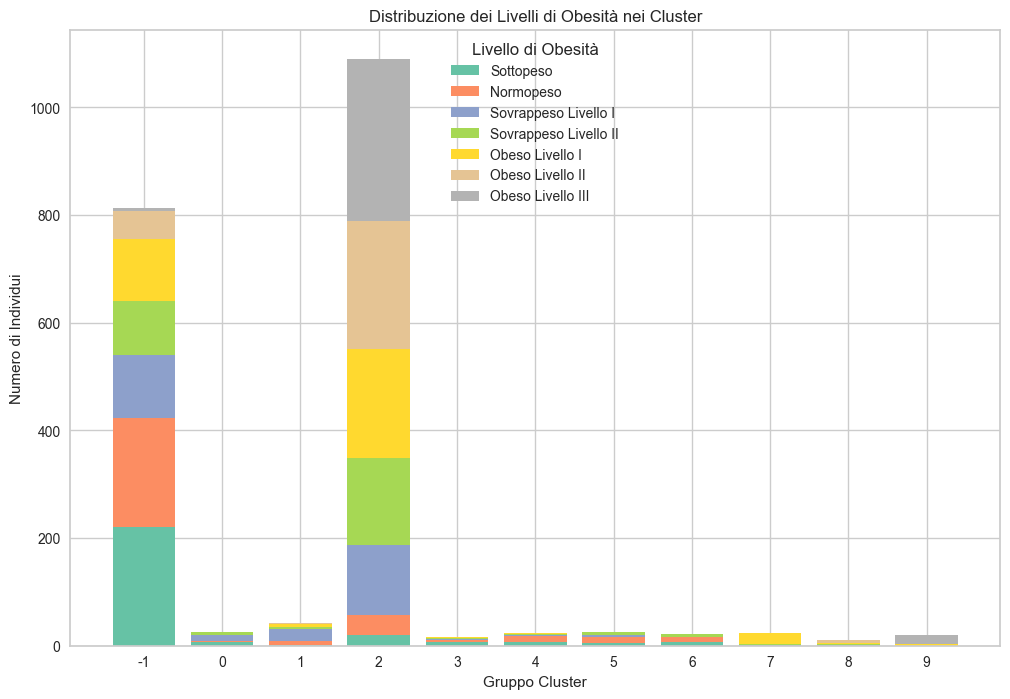

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Conta i livelli di obesità per ogni cluster
obesity_per_cluster = filtered_data.value_counts(["db_scan_Cluster", "Obesity"]).reset_index(name="Count")

# Mappatura dei livelli di obesità ai nuovi nomi
obesity_labels = {
    "Insufficient_Weight": "Sottopeso",
    "Normal_Weight": "Normopeso",
    "Overweight_Level_I": "Sovrappeso Livello I",
    "Overweight_Level_II": "Sovrappeso Livello II",
    "Obesity_Type_I": "Obeso Livello I",
    "Obesity_Type_II": "Obeso Livello II",
    "Obesity_Type_III": "Obeso Livello III"
}

# Sostituzione dei nomi nel dataframe
obesity_per_cluster["Obesity"] = obesity_per_cluster["Obesity"].replace(obesity_labels)

# Definizione dell'ordine dei livelli di obesità
ordine_obesità = [
    "Sottopeso",
    "Normopeso",
    "Sovrappeso Livello I",
    "Sovrappeso Livello II",
    "Obeso Livello I",
    "Obeso Livello II",
    "Obeso Livello III"
]

# Selezione della colormap e assegnazione di un colore per ciascun livello
colormap = plt.colormaps["Set2"]
colori = {label: colormap(i / (len(ordine_obesità) - 1)) for i, label in enumerate(ordine_obesità)}

# Assicura che tutti i cluster siano presenti e ordinati sull'asse X
clusters = sorted(filtered_data["db_scan_Cluster"].unique())  # Prendi tutti i cluster esistenti
obesity_per_cluster["db_scan_Cluster"] = pd.Categorical(obesity_per_cluster["db_scan_Cluster"], categories=clusters, ordered=True)

# Inizializza per ogni cluster il valore 'bottom' per l'impilamento
bottoms = {cluster: 0 for cluster in clusters}

# Creazione del grafico
plt.figure(figsize=(12, 8))

# Disegna il grafico impilato rispettando l'ordine dei livelli di obesità
for livello in ordine_obesità:
    for cluster in clusters:
        # Filtra il dataframe per il cluster e il livello di obesità corrente
        row = obesity_per_cluster[(obesity_per_cluster["db_scan_Cluster"] == cluster) & (obesity_per_cluster["Obesity"] == livello)]
        count = row["Count"].iloc[0] if not row.empty else 0

        # Disegna la barra impilata e aggiunge la legenda solo al primo cluster
        if cluster == clusters[0]:
            plt.bar(cluster, count, bottom=bottoms[cluster], color=colori[livello], label=livello)
        else:
            plt.bar(cluster, count, bottom=bottoms[cluster], color=colori[livello])
        
        # Aggiorna il valore di 'bottom' per il cluster
        bottoms[cluster] += count

# Personalizzazione del grafico
plt.xlabel("Gruppo Cluster")
plt.ylabel("Numero di Individui")
plt.title("Distribuzione dei Livelli di Obesità nei Cluster")
plt.xticks(ticks=clusters, labels=clusters)  # Imposta le etichette dei cluster in ordine
plt.legend(title="Livello di Obesità", loc="upper center")  # Legenda sopra il grafico
plt.show()
